In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# for scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for evaluation

In [ ]:
# loading the dataset
bs = pd.read_csv('beer-servings.csv', index_col = 0)
bs

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [ ]:
# checking for duplicates
bs.duplicated().sum()

0

In [ ]:
bs['country'].nunique()

193

In [ ]:
bs['continent'].nunique()

6

In [ ]:
bs['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [ ]:
bs['continent'].value_counts()

continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: count, dtype: int64

In [ ]:
# dropping the country column
bs = bs.drop(columns = ['country'])
bs.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


In [ ]:
# checking for missing values
bs.isnull().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [ ]:
# filling the missing values with median of each column
for col in ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']:
    bs[col] = bs[col].fillna(bs[col].median())

In [ ]:
# checking for missing values
bs.isnull().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [ ]:
# to get statistics
bs.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.00000,193.000000
mean,103.917098,82.259067,48.88601,4.739119
std,98.580146,87.389366,79.41700,3.757996
min,0.000000,0.000000,0.00000,0.000000
25%,21.000000,5.000000,1.00000,1.300000
50%,76.000000,60.000000,9.00000,4.250000
75%,171.000000,128.000000,59.00000,7.200000
max,376.000000,438.000000,370.00000,14.400000


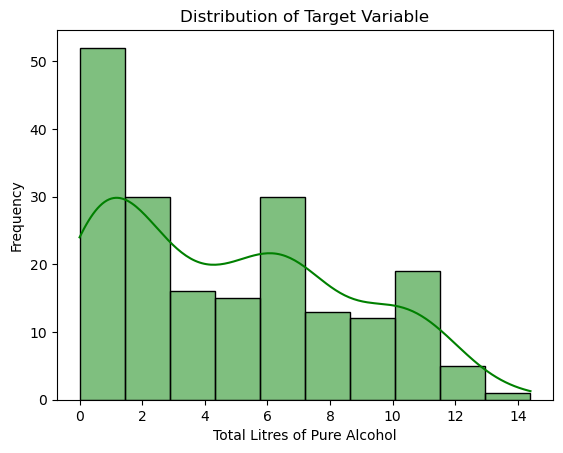

In [ ]:
# Visualizing target variable
sns.histplot(bs['total_litres_of_pure_alcohol'], bins=10, color='green', kde=True)
plt.xlabel('Total Litres of Pure Alcohol')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

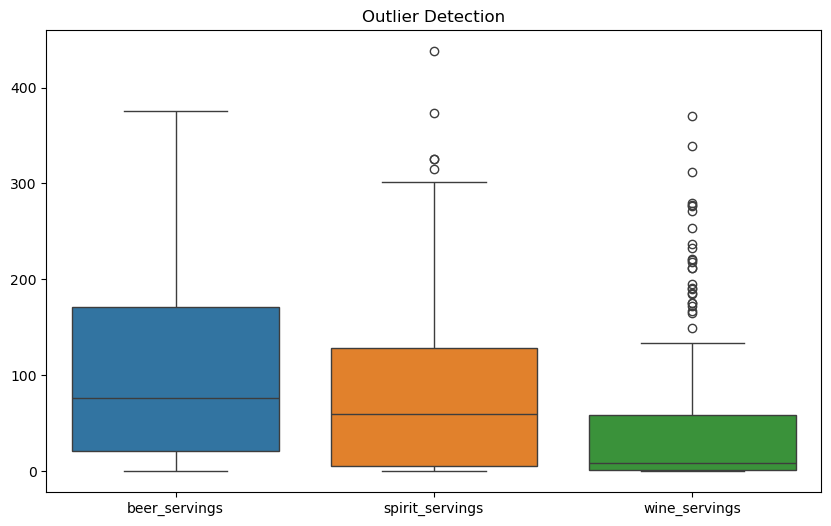

In [ ]:
# Checking for outliers
numerical_columns = ['beer_servings', 'spirit_servings', 'wine_servings']
plt.figure(figsize=(10,6))
sns.boxplot(data=bs[numerical_columns])
plt.title('Outlier Detection')
plt.show()

In [ ]:
# Treating the Outlier using IQR
outlier_columns = ['spirit_servings', 'wine_servings']

# Calculate the quartiles and IQR for the outlier columns
Q1 = bs[outlier_columns].quantile(0.25)
Q3 = bs[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

# Outlier treatment using IQR method (capping at 1.5 times IQR)
outliers_lower = bs[outlier_columns] < (Q1 - 1.5 * IQR)
outliers_upper = bs[outlier_columns] > (Q3 + 1.5 * IQR)

# Cap the outliers to 1.5 times IQR
bs[outlier_columns] = bs[outlier_columns].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR, axis = 1)

# any below the limit and over the limit is brought to q1 - 1.5*IQR and q3 + 1.5*IQR

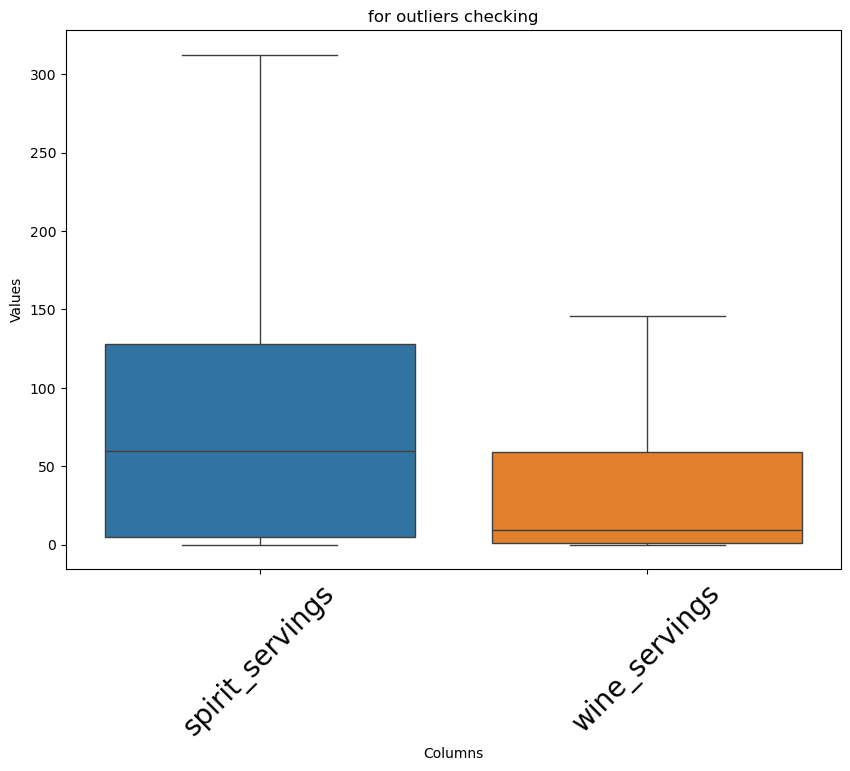

In [ ]:
# Confirm outliers removed
outlier_recheck = ['spirit_servings','wine_servings']
plt.figure(figsize = (10,7))
sns.boxplot(data=bs[outlier_recheck])
plt.title('for outliers checking')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45, fontsize = 20)
plt.show()

In [ ]:
bs.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,146.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


In [ ]:
bs['continent'].value_counts()

continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: count, dtype: int64

In [ ]:
bs.shape

(193, 5)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Initializing OneHotEncoder
encoder = OneHotEncoder()

In [ ]:
# Fitting and transforming the 'continent' column
encoded_continent = encoder.fit_transform(bs[['continent']]).toarray()

# Getting feature names for the encoded columns
encoded_continent_bs = pd.DataFrame(encoded_continent, columns=encoder.get_feature_names_out(['continent']))

# Concatenating the encoded columns with the original dataframe
one_hot_encoded_bs = pd.concat([bs, encoded_continent_bs], axis=1).drop('continent', axis=1)

In [ ]:
one_hot_encoded_bs.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9,0.0,0.0,1.0,0.0,0.0,0.0
2,25.0,0.0,14.0,0.7,1.0,0.0,0.0,0.0,0.0,0.0
3,245.0,138.0,146.0,12.4,0.0,0.0,1.0,0.0,0.0,0.0
4,217.0,57.0,45.0,5.9,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
one_hot_encoded_bs.shape

(193, 10)

In [ ]:
# Scaling

numerical_columns = ['beer_servings', 'spirit_servings', 'wine_servings']
# Feature scaling
scaler = StandardScaler()
one_hot_encoded_bs[numerical_columns] = scaler.fit_transform(one_hot_encoded_bs[numerical_columns])

In [ ]:
one_hot_encoded_bs.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,-1.056880,-0.971267,-0.723136,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.151713,0.608759,0.302520,4.9,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.802619,-0.971267,-0.457225,0.7,1.0,0.0,0.0,0.0,0.0,0.0
3,1.434871,0.680578,2.049934,12.4,0.0,0.0,1.0,0.0,0.0,0.0
4,1.150100,-0.288983,0.131578,5.9,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
one_hot_encoded_bs.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,1.930000e+02,1.930000e+02,1.930000e+02,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,1.035441e-17,-4.601961e-17,-3.221373e-17,4.739119,0.274611,0.227979,0.233161,0.119171,0.082902,0.062176
std,1.002601e+00,1.002601e+00,1.002601e+00,3.757996,0.447479,0.420620,0.423943,0.324832,0.276450,0.242103
min,-1.056880e+00,-9.712666e-01,-7.231355e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.433011e-01,-9.114171e-01,-7.041419e-01,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.839284e-01,-2.530732e-01,-5.521929e-01,4.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.822608e-01,5.608792e-01,3.974883e-01,7.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.767195e+00,2.769324e+00,2.049934e+00,14.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Splitting dataset
X = one_hot_encoded_bs.drop(columns=['total_litres_of_pure_alcohol'])
y = one_hot_encoded_bs['total_litres_of_pure_alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
one_hot_encoded_bs.shape

(193, 10)

In [ ]:
X.head()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,-1.056880,-0.971267,-0.723136,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.151713,0.608759,0.302520,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.802619,-0.971267,-0.457225,1.0,0.0,0.0,0.0,0.0,0.0
3,1.434871,0.680578,2.049934,0.0,0.0,1.0,0.0,0.0,0.0
4,1.150100,-0.288983,0.131578,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

0     0.0
1     4.9
2     0.7
3    12.4
4     5.9
Name: total_litres_of_pure_alcohol, dtype: float64

In [ ]:
X_train.shape

(154, 9)

In [ ]:
193*0.8

154.4

In [ ]:
193*0.2

38.6

In [ ]:
X_test.shape

(39, 9)

In [ ]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [ ]:
# Function to evaluate model
def evaluate_model(y_actual, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_actual, y_pred))
    print("MSE:", mean_squared_error(y_actual, y_pred))
    print("R2 Score:", r2_score(y_actual, y_pred))
    print("\n")

In [ ]:
evaluate_model(y_test, lr_predictions, "Linear Regression")

Linear Regression Performance:
MAE: 0.882994312786772
MSE: 2.0777361370626717
R2 Score: 0.9019077920206002




In [ ]:
# Function to visualize actual vs predicted values
def visualize_predictions(y_actual, y_pred, model_name):
    results_df = pd.DataFrame({'Actual': y_actual.values, 'Predicted': y_pred})
    print(results_df.head(10))

    plt.figure(figsize=(8,5))
    sns.scatterplot(x=y_actual, y=y_pred, color='blue', alpha=0.6)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.show()

   Actual  Predicted
0    11.8  12.859447
1     0.9   1.289584
2     6.6   4.703111
3    10.1  10.033329
4     4.9   6.087585
5     4.1   5.815101
6    14.4   8.884348
7     1.1   2.341789
8    10.5  10.668055
9     9.7  10.247724


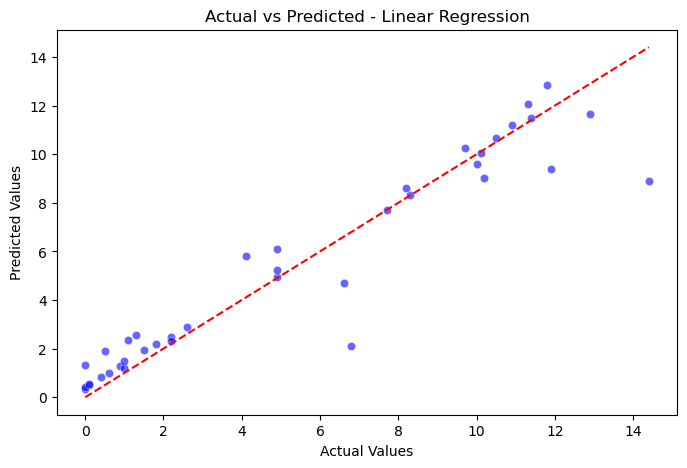

In [ ]:
visualize_predictions(y_test, lr_predictions, "Linear Regression")

In [ ]:
# 120, 150, 80, Europe

# Predicting for unseen data
unseen_data = pd.DataFrame([[120, 150, 80, "Europe"]],
                           columns=['beer_servings', 'spirit_servings', 'wine_servings', 'continent'])

In [ ]:
# Predicting for unseen data
unseen_data

,beer_servings,spirit_servings,wine_servings,continent
0,120,150,80,Europe


In [ ]:
# Encoding unseen data
encoded_unseen = encoder.transform(unseen_data[['continent']]).toarray()
unseen_data_encoded = pd.DataFrame(encoded_unseen, columns=encoder.get_feature_names_out(['continent']))
unseen_data = pd.concat([unseen_data.drop(columns=['continent']), unseen_data_encoded], axis=1)

In [ ]:
unseen_data

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,120,150,80,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Apply Feature Scaling
unseen_data[numerical_columns] = scaler.transform(unseen_data[numerical_columns])
unseen_data

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.16357,0.824217,0.796354,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Make prediction
unseen_prediction = lr_model.predict(unseen_data)
print("Predicted Value for Unseen Data:", unseen_prediction)

Predicted Value for Unseen Data: [6.93126159]
